<a href="https://colab.research.google.com/github/eray0zer/kalp-krizi-riski-tahmini/blob/main/Kalp_Krizi_Riski_Tahmini.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Kütüphaneler ve veriyi okutma işlemleri**

---



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')

from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split


# from termcolor import colored

import warnings
warnings.filterwarnings(action='ignore')

In [ ]:
from google.colab import files
yuklenen = files.upload()

Saving heart.csv to heart.csv


In [ ]:
#veriyi okutma
veri = pd.read_csv('heart.csv')

#veriyi sütun şeklinde yazdır ilk 14
veri.head(14)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [ ]:
#veri sayısı ve nitelikler
veri.shape

(303, 14)

In [ ]:
veri.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
#null varmı ? / hiç null değeri bulunmadığından null çıkarma işlemleri uygulamadık
veri.isnull().values.any()

False

In [ ]:
#bazı temel istatiskler
veri.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
#kaç kişide kalp krizi var? , kaç kişide yok ?
veri['target'].value_counts()

# 1 Kalp krizi geçirmiş kişiler
# 0 Kalp krizi geçirmemiş kişiler

1    165
0    138
Name: target, dtype: int64

# **Görselleştirme (Visualizing)**:

---



### **Dağılımlar**

In [ ]:
#Görsel anlamda iyi bir inceleme yapmak için numerik verileri ayırıyoruz
numerik_ozellik = ['age', 'sex', 'trestbps', 'chol', 'thalach', 'oldpeak', 'slope', 'ca', 'target']

gorselveri = veri.loc[:, numerik_ozellik].copy()

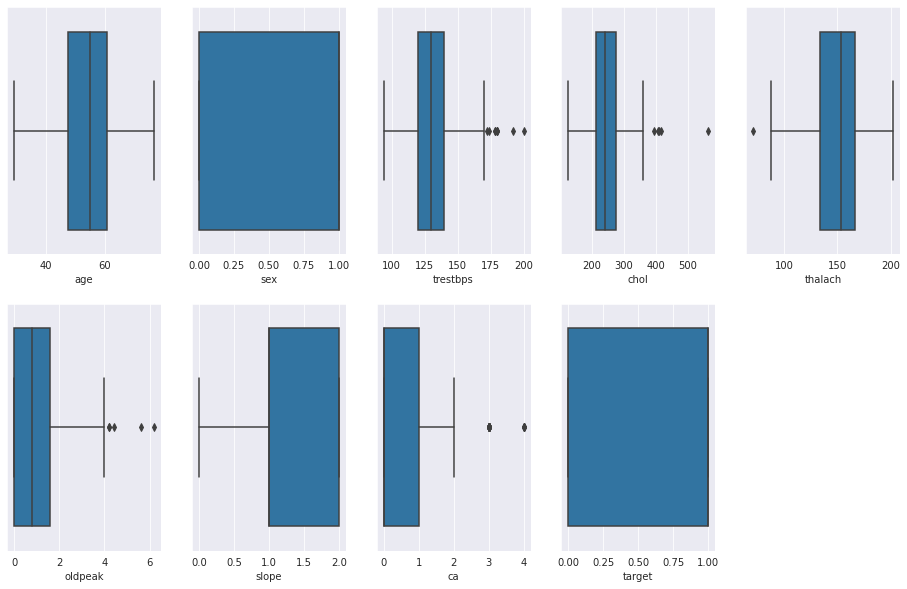

In [ ]:
plt.figure(figsize=(16, 10))

for i in range(len(gorselveri.columns)):
    plt.subplot(2, 5, i + 1)
    sns.boxplot(gorselveri[gorselveri.columns[i]])

plt.show()

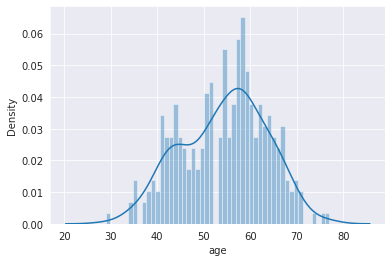

In [ ]:
sns.distplot(veri["age"] , bins=50)

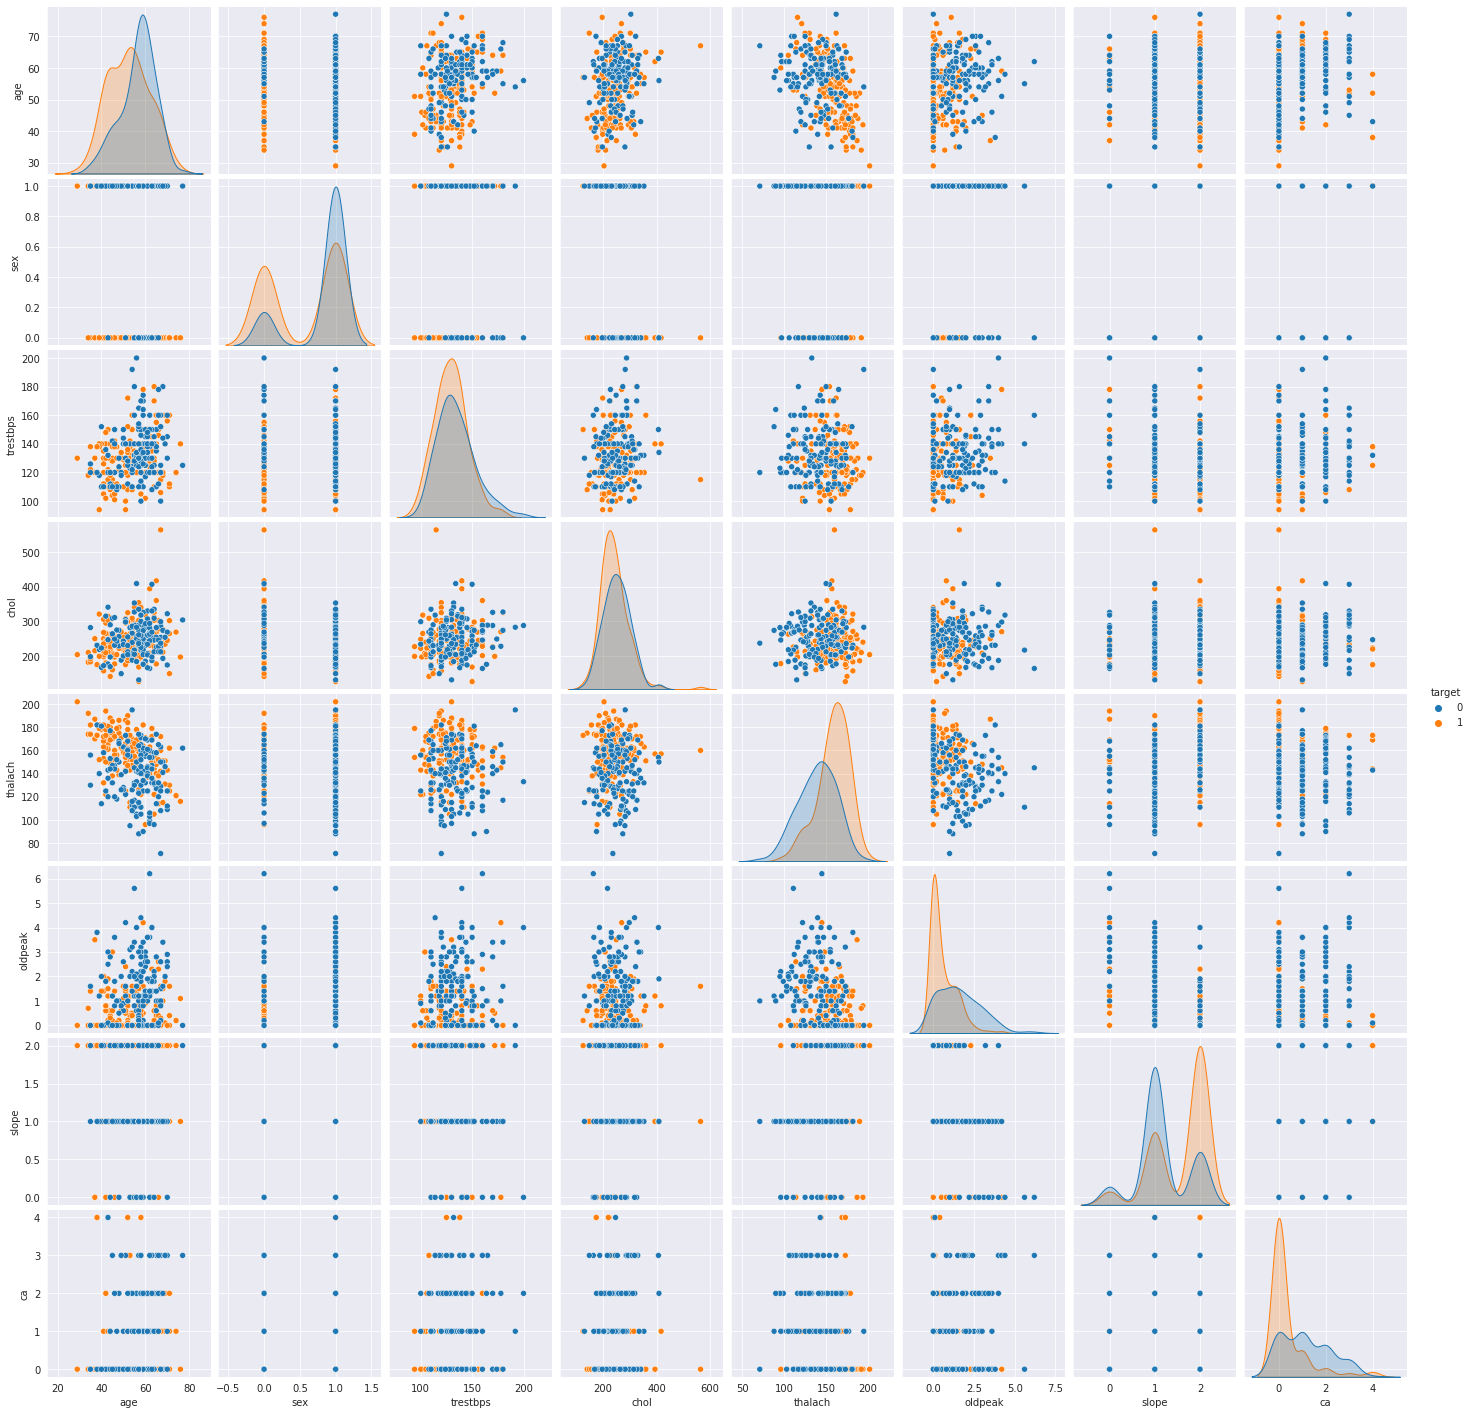

In [ ]:
sns.pairplot(gorselveri , hue = "target")

### **Isı Haritası**

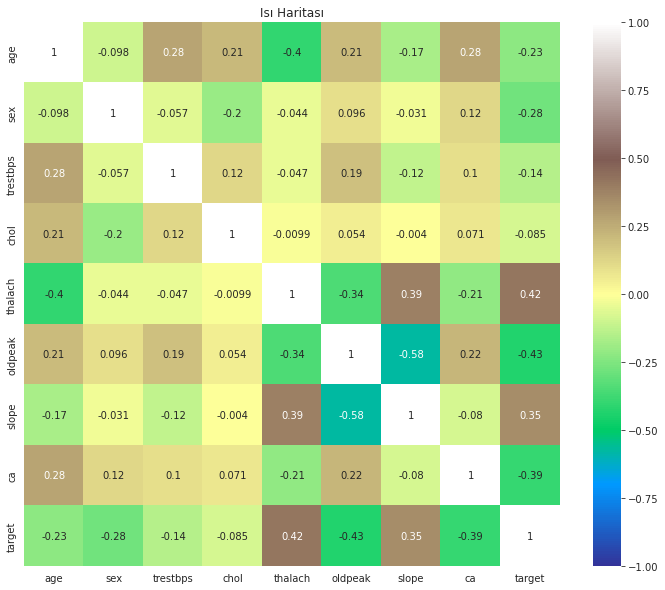

In [ ]:
korelasyon = gorselveri.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(korelasyon, annot=True, vmin=-1.0, cmap="terrain")
plt.title("Isı Haritası")
plt.show()

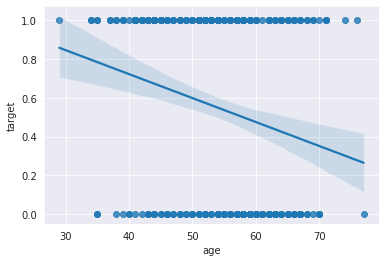

In [ ]:
sns.regplot("age" , "target" , data = veri)

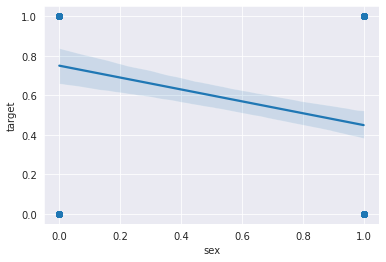

In [ ]:
sns.regplot("sex" , "target" , data = veri)

### **Pasta grafikli Count Plot**

In [ ]:
#Kalp krizi geçirme durumu 
print(veri['target'], "\n")
print(veri['target'].value_counts())
print('\n0 = Kalp krizi geçirmemiş\n1 = Kalp krizi geçirmiş')

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64 

1    165
0    138
Name: target, dtype: int64

0 = Kalp krizi geçirmemiş
1 = Kalp krizi geçirmiş


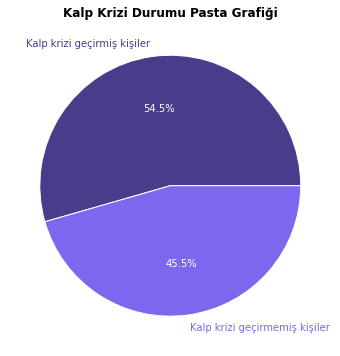

In [ ]:
#matplotlib kullanarak pasta grafiği oluşturup şekillendirme #target

plt.figure(figsize=(6, 6))
labels = 'Kalp krizi geçirmiş kişiler', 'Kalp krizi geçirmemiş kişiler'
patches, texts, autotexts = plt.pie(veri['target'].value_counts(), colors=['#483D8B', '#7B68EE'], autopct='%.1f%%', radius=1, labels=['Kalp krizi geçirmiş kişiler', 'Kalp krizi geçirmemiş kişiler'], )
texts[0].set_color('#483D8B')
texts[1].set_color('#7B68EE')
[autotext.set_color('white') for autotext in autotexts]
plt.title('Kalp Krizi Durumu Pasta Grafiği', color ='black', weight= 'bold')
plt.show()


# **Veri Ön İşleme (Preprocessing)**:

---




In [ ]:
#nominal yani kategorize verileri binary şeklinde yazdırarak one hot encoding işlemi

def onehot_encode(df, column_dict):
    df = df.copy()
    for column, prefix in column_dict.items():
        dummies = pd.get_dummies(df[column], prefix=prefix)
        df = pd.concat([df, dummies], axis=1)
        df = df.drop(column, axis=1)
    return df

In [ ]:
#genel bir fonksiyon yazarak one-hot, ayırma ve scale işlemlerini yaptırıyoruz

def veri_onisleme(df, scaler):
  df = df.copy()

  # yukarıdaki onehot fonksiyonu ile nominal öznitelikleri mini kategorilere ayırma
  nominal_features = ['cp', 'slope', 'thal']
  df = onehot_encode(df, dict(zip(nominal_features, ['c', 's', 't'])))
  
  # Target verisini ayırıp x ve y şeklinde yazma
  Y = df['target'].copy()
  X = df.drop('target', axis=1).copy()

  # Özniteliklere scale işlemi
  X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

  return X, Y

In [ ]:
#Yazdığımız fonksiyonu veri setimize uyguluyoruz // Üç farklı scaler arasında çoğu algoritmada en iyi sonucu standarscaler verdi
X, Y = veri_onisleme(veri, StandardScaler())

In [ ]:
#Geri kalan nitelikler
print(X)
print(Y)

          age       sex  trestbps  ...       t_1       t_2       t_3
0    0.952197  0.681005  0.763956  ...  3.979112 -1.100763 -0.793116
1   -1.915313  0.681005 -0.092738  ... -0.251312  0.908461 -0.793116
2   -1.474158 -1.468418 -0.092738  ... -0.251312  0.908461 -0.793116
3    0.180175  0.681005 -0.663867  ... -0.251312  0.908461 -0.793116
4    0.290464 -1.468418 -0.663867  ... -0.251312  0.908461 -0.793116
..        ...       ...       ...  ...       ...       ...       ...
298  0.290464 -1.468418  0.478391  ... -0.251312 -1.100763  1.260850
299 -1.033002  0.681005 -1.234996  ... -0.251312 -1.100763  1.260850
300  1.503641  0.681005  0.706843  ... -0.251312 -1.100763  1.260850
301  0.290464  0.681005 -0.092738  ... -0.251312 -1.100763  1.260850
302  0.290464 -1.468418 -0.092738  ... -0.251312  0.908461 -0.793116

[303 rows x 21 columns]
0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64


In [ ]:
#Sütunlardaki farklı değerlerin sayısı
{column: len(X[column].unique()) for column in X.columns}

{'age': 41,
 'c_0': 2,
 'c_1': 2,
 'c_2': 2,
 'c_3': 2,
 'ca': 5,
 'chol': 152,
 'exang': 2,
 'fbs': 2,
 'oldpeak': 40,
 'restecg': 3,
 's_0': 2,
 's_1': 2,
 's_2': 2,
 'sex': 2,
 't_0': 2,
 't_1': 2,
 't_2': 2,
 't_3': 2,
 'thalach': 91,
 'trestbps': 49}

In [ ]:
#sk library kullanarak eğitim ve test verisini ayırma
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=0)

In [ ]:
X_train.var()

age         0.990285
sex         0.953757
trestbps    0.998133
chol        0.974961
fbs         1.117379
restecg     1.023736
thalach     1.031090
exang       0.983352
oldpeak     0.959396
ca          1.035543
c_0         1.001747
c_1         0.964664
c_2         1.033450
c_3         1.035680
s_0         1.071778
s_1         1.005554
s_2         1.001228
t_0         1.255156
t_1         1.044847
t_2         1.007826
t_3         1.010171
dtype: float64

In [ ]:
#verilerin tamamı,ayrılmış eğitim verisi, test verisi
print(X.shape, X_train.shape, X_test.shape)

(303, 21) (242, 21) (61, 21)


In [ ]:
#Verideki dengeyi value_count ile kontrol ettiğimizde verimiz dengeli gözüküyor bu yüzden imbalance yöntemi uygulamamıza gerek kalmadı / 

print(Y_train.value_counts(),"\n\n")
print(Y_test.value_counts())


1    132
0    110
Name: target, dtype: int64 


1    33
0    28
Name: target, dtype: int64


# **Algoritmalar ve doğruluk değerleri(default)**

---



--- 

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB

models = {
    "             Logistic Regression      ": LogisticRegression(),
    "             K-Nearest Neighbors      ": KNeighborsClassifier(),
    "               Decision Tree          ": DecisionTreeClassifier(),
    "            SVM (Linear Kernel)       ": LinearSVC(),
    "             SVM (RBF Kernel)         ": SVC(),
    "              Neural Network          ": MLPClassifier(),
    "               Random Forest          ": RandomForestClassifier(),
    "             Gradient Boosting        ": GradientBoostingClassifier(),
    "                  XGBoost             ": XGBClassifier(eval_metric='mlogloss'),
    "                  LightGBM            ": LGBMClassifier(),
    "                 GaussianNB           ": GaussianNB(),
    "                BernoulliNB           ": BernoulliNB()
}

for name, model in models.items():
    model.fit(X_train, Y_train)
    print(name + " algoritması eğitildi.")

             Logistic Regression       algoritması eğitildi.
             K-Nearest Neighbors       algoritması eğitildi.
               Decision Tree           algoritması eğitildi.
            SVM (Linear Kernel)        algoritması eğitildi.
             SVM (RBF Kernel)          algoritması eğitildi.
              Neural Network           algoritması eğitildi.
               Random Forest           algoritması eğitildi.
             Gradient Boosting         algoritması eğitildi.
                  XGBoost              algoritması eğitildi.
                  LightGBM             algoritması eğitildi.
                 GaussianNB            algoritması eğitildi.
                BernoulliNB            algoritması eğitildi.


In [ ]:
from sklearn.metrics import accuracy_score, f1_score



In [ ]:

print("\t\t\t\t\tModel Performansı TRAIN\t\t\t\t\t\tModel Performansı TEST\n\t\t\t\t\t-----------------------\t\t\t\t\t\t-----------------------")
for name, model in models.items():
    Y_tahmin = model.predict(X_train)
    Y_tahmin2 = model.predict(X_test)
    print(
        "\n" + name + "  Doğruluk: {:.3f}%\tF1-Score: {:.5f}\t\t\t"\
        .format(accuracy_score(Y_train, Y_tahmin) * 100, f1_score(Y_train, Y_tahmin)) + " Doğruluk: {:.3f}%\tF1-Score: {:.5f}"\
        .format(accuracy_score(Y_test, Y_tahmin2) * 100, f1_score(Y_test, Y_tahmin2)))

					Model Performansı TRAIN						Model Performansı TEST
					-----------------------						-----------------------

             Logistic Regression        Doğruluk: 83.884%	F1-Score: 0.85502			 Doğruluk: 83.607%	F1-Score: 0.85294

             K-Nearest Neighbors        Doğruluk: 86.364%	F1-Score: 0.87732			 Doğruluk: 81.967%	F1-Score: 0.83077

               Decision Tree            Doğruluk: 100.000%	F1-Score: 1.00000			 Doğruluk: 75.410%	F1-Score: 0.77612

            SVM (Linear Kernel)         Doğruluk: 83.884%	F1-Score: 0.85609			 Doğruluk: 83.607%	F1-Score: 0.85294

             SVM (RBF Kernel)           Doğruluk: 90.496%	F1-Score: 0.91386			 Doğruluk: 88.525%	F1-Score: 0.89552

              Neural Network            Doğruluk: 95.455%	F1-Score: 0.95911			 Doğruluk: 86.885%	F1-Score: 0.88235

               Random Forest            Doğruluk: 100.000%	F1-Score: 1.00000			 Doğruluk: 81.967%	F1-Score: 0.83077

             Gradient Boosting          Doğruluk: 100.000%	F1-Score: 1

In [ ]:
train1 = [] * 12
test1 = [] * 12
for name, model in models.items():
  skor = model.score(X_train, Y_train)
  skor2 = model.score(X_test, Y_test)
  train1.append(skor * 100)
  test1.append(skor2 * 100)


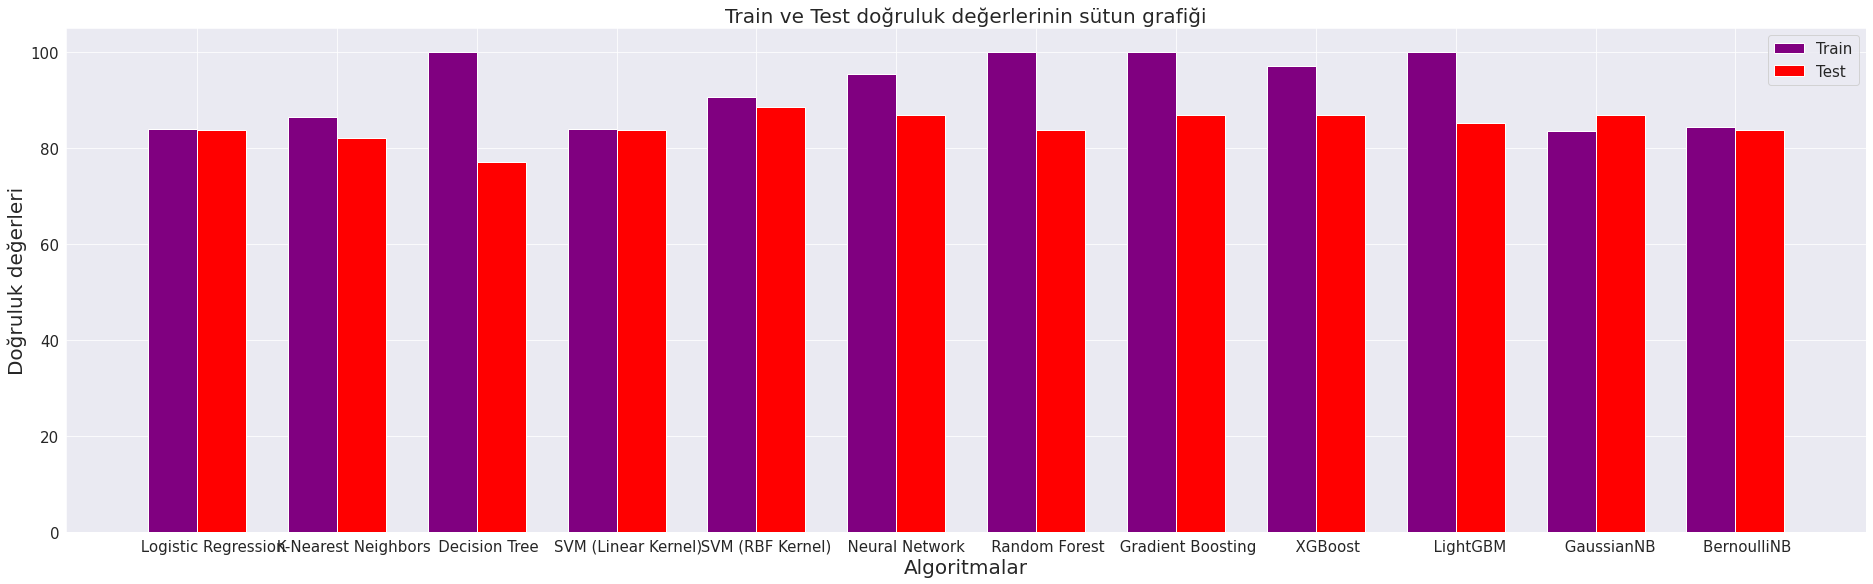

In [ ]:
fig = plt.figure(figsize=(25,7))

ax = fig.add_axes([0,0,1,1])

model_isim = [] * 10
skorlar = [] * 10
skorlar2 = [] * 10
for name, model in models.items():
    Y_tahmin = model.predict(X_train)
    Y_tahmin2 = model.predict(X_test)
    model_isim.append(name)
    skorlar.append(accuracy_score(Y_train, Y_tahmin) * 100)
    skorlar2.append(accuracy_score(Y_test, Y_tahmin2) * 100)
    

x = np.arange(len(model_isim))
width = 0.35 
rects1 = ax.bar(x - width/2, skorlar, width, label='Train', color='purple')
rects2 = ax.bar(x + width/2, skorlar2, width, label='Test', color= 'red')

plt.title("Train ve Test doğruluk değerlerinin sütun grafiği", fontsize = 20)
plt.xlabel('Algoritmalar', fontsize = 20)
plt.ylabel('Doğruluk değerleri', fontsize = 20)
ax.set_xticks(x)
ax.set_xticklabels(model_isim)
ax.legend()
plt.rcParams.update({'font.size': 15})


plt.show()

In [ ]:
#modellere göre confusion matrixi ile dengesizliklere baktık

from sklearn.metrics import confusion_matrix

for name, model in models.items():
    Y_tahmin = model.predict(X_test)
    print(name, "\n", confusion_matrix(Y_test , Y_tahmin, labels=[0,1]), "\n")

             Logistic Regression       
 [[22  6]
 [ 5 28]] 

             K-Nearest Neighbors       
 [[24  4]
 [ 9 24]] 

               Decision Tree           
 [[19  9]
 [ 6 27]] 

            SVM (Linear Kernel)        
 [[22  6]
 [ 6 27]] 

             SVM (RBF Kernel)          
 [[24  4]
 [ 4 29]] 

              Neural Network           
 [[23  5]
 [ 3 30]] 

               Random Forest           
 [[24  4]
 [ 5 28]] 

             Gradient Boosting         
 [[24  4]
 [ 4 29]] 

                  XGBoost              
 [[23  5]
 [ 5 28]] 

                  LightGBM             
 [[23  5]
 [ 3 30]] 

                 GaussianNB            
 [[24  4]
 [ 4 29]] 

                BernoulliNB            
 [[23  5]
 [ 5 28]] 



             Logistic Regression       0.8322510822510822
             K-Nearest Neighbors       0.8198051948051949
               Decision Tree           0.7689393939393939
            SVM (Linear Kernel)        0.8322510822510822
             SVM (RBF Kernel)          0.8831168831168832
              Neural Network           0.8831168831168832
               Random Forest           0.8679653679653682
             Gradient Boosting         0.8679653679653682
                  XGBoost              0.8679653679653682
                  LightGBM             0.8501082251082251


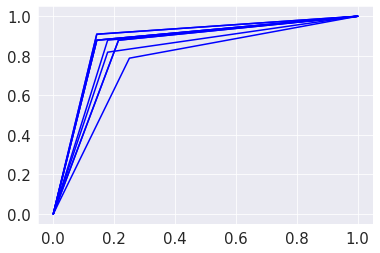

In [ ]:
import sklearn.metrics as metrics


for name, model in models.items():
    Y_tahmin = model.predict(X_test)
    fpr , tpr , thresholds = metrics.roc_curve(Y_test , Y_tahmin)
    roc_auc = metrics.auc(fpr , tpr)
    plt.plot(fpr , tpr ,'b' ,label = 'AUC =0.2f' %roc_auc)
    print(name, roc_auc)

# **SMOTE oversampling ile veriyi çoğaltma**

---



---



In [ ]:
#toplam 242 veriden oluşan train seti 


Y_train.value_counts()

1    132
0    110
Name: target, dtype: int64

In [ ]:
#ros smote smotenc adasyn

from imblearn import over_sampling
from imblearn.over_sampling import SMOTE 
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTENC
from imblearn.over_sampling import ADASYN 


smt = SMOTE(random_state=59)
X_train2, Y_train2 = smt.fit_resample(X_train, Y_train)


In [ ]:
Y_train2.value_counts()

1    132
0    132
Name: target, dtype: int64

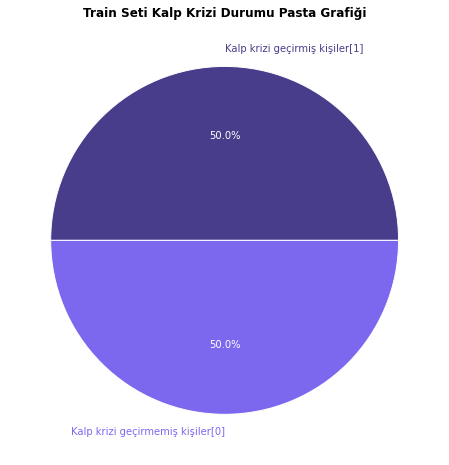

In [ ]:
plt.figure(figsize=(8, 8))
labels = 'Kalp krizi geçirmiş kişiler', 'Kalp krizi geçirmemiş kişiler'
patches, texts, autotexts = plt.pie(Y_train2.value_counts(), colors=['#483D8B', '#7B68EE'], autopct='%.1f%%', radius=1, labels=['Kalp krizi geçirmiş kişiler[1]', 'Kalp krizi geçirmemiş kişiler[0]'], )
texts[0].set_color('#483D8B')
texts[1].set_color('#7B68EE')
[autotext.set_color('white') for autotext in autotexts]
plt.title('Train Seti Kalp Krizi Durumu Pasta Grafiği', color ='black', weight= 'bold')
plt.show()

In [ ]:
for name, model in models.items():
    model.fit(X_train2, Y_train2)
    print(name + " algoritması eğitildi.")

             Logistic Regression       algoritması eğitildi.
             K-Nearest Neighbors       algoritması eğitildi.
               Decision Tree           algoritması eğitildi.
            SVM (Linear Kernel)        algoritması eğitildi.
             SVM (RBF Kernel)          algoritması eğitildi.
              Neural Network           algoritması eğitildi.
               Random Forest           algoritması eğitildi.
             Gradient Boosting         algoritması eğitildi.
                  XGBoost              algoritması eğitildi.
                  LightGBM             algoritması eğitildi.
                 GaussianNB            algoritması eğitildi.
                BernoulliNB            algoritması eğitildi.


In [ ]:
print("\t\t\t\t\tModel Performansı TRAIN\t\t\t\t\t\tModel Performansı TEST\n\t\t\t\t\t-----------------------\t\t\t\t\t\t-----------------------")
for name, model in models.items():
    Y_tahmins = model.predict(X_train2)
    Y_tahmins2 = model.predict(X_test)
    print(
        "\n" + name + "  Doğruluk: {:.3f}%\tF1-Score: {:.5f}\t\t\t"\
        .format(accuracy_score(Y_train2, Y_tahmins) * 100, f1_score(Y_train2, Y_tahmins)) + " Doğruluk: {:.3f}%\tF1-Score: {:.5f}"\
        .format(accuracy_score(Y_test, Y_tahmins2) * 100, f1_score(Y_test, Y_tahmins2)))

					Model Performansı TRAIN						Model Performansı TEST
					-----------------------						-----------------------

             Logistic Regression        Doğruluk: 84.091%	F1-Score: 0.84559			 Doğruluk: 81.967%	F1-Score: 0.83582

             K-Nearest Neighbors        Doğruluk: 87.121%	F1-Score: 0.86719			 Doğruluk: 78.689%	F1-Score: 0.78689

               Decision Tree            Doğruluk: 100.000%	F1-Score: 1.00000			 Doğruluk: 72.131%	F1-Score: 0.75362

            SVM (Linear Kernel)         Doğruluk: 84.091%	F1-Score: 0.84559			 Doğruluk: 80.328%	F1-Score: 0.81818

             SVM (RBF Kernel)           Doğruluk: 90.909%	F1-Score: 0.90909			 Doğruluk: 86.885%	F1-Score: 0.87879

              Neural Network            Doğruluk: 97.727%	F1-Score: 0.97727			 Doğruluk: 86.885%	F1-Score: 0.88235

               Random Forest            Doğruluk: 100.000%	F1-Score: 1.00000			 Doğruluk: 85.246%	F1-Score: 0.86154

             Gradient Boosting          Doğruluk: 100.000%	F1-Score: 1

In [ ]:
train2 = [] * 12
test2 = [] * 12
for name, model in models.items():
  skor = model.score(X_train2, Y_train2)
  skor2 = model.score(X_test, Y_test)
  train2.append(skor * 100)
  test2.append(skor2 * 100)


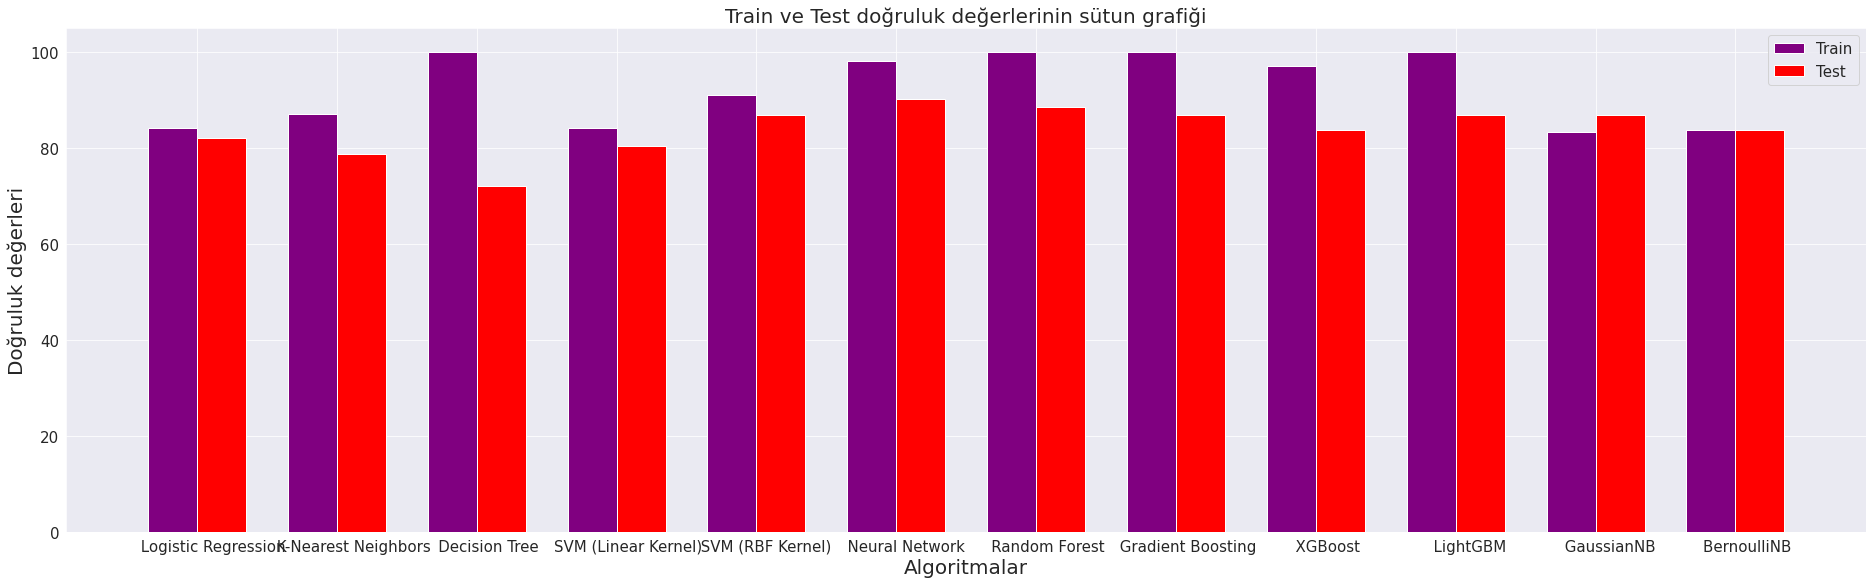

In [ ]:
fig = plt.figure(figsize=(25,7))

ax = fig.add_axes([0,0,1,1])

model_isim = [] * 10
skorlar = [] * 10
skorlar2 = [] * 10
for name, model in models.items():
    Y_tahmin = model.predict(X_train2)
    Y_tahmin2 = model.predict(X_test)
    model_isim.append(name)
    skorlar.append(accuracy_score(Y_train2, Y_tahmin) * 100)
    skorlar2.append(accuracy_score(Y_test, Y_tahmin2) * 100)
    

x = np.arange(len(model_isim))
width = 0.35 
rects1 = ax.bar(x - width/2, skorlar, width, label='Train', color='purple')
rects2 = ax.bar(x + width/2, skorlar2, width, label='Test', color= 'red')

plt.title("Train ve Test doğruluk değerlerinin sütun grafiği", fontsize = 20)
plt.xlabel('Algoritmalar', fontsize = 20)
plt.ylabel('Doğruluk değerleri', fontsize = 20)
ax.set_xticks(x)
ax.set_xticklabels(model_isim)
ax.legend()
plt.rcParams.update({'font.size': 15})


plt.show()

# **Hiperparametre arama**

---



---



In [ ]:
from sklearn.model_selection import GridSearchCV

print(Y_train.value_counts())
print(Y_train2.value_counts())

1    132
0    110
Name: target, dtype: int64
1    132
0    132
Name: target, dtype: int64


**LogisticRegression GridSearch**

In [ ]:
#LogisticRegression GridSearchCV ile

param_grid_log = [    
    {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 500, 1000, 1500, 2000]
    }
]
logModel = models["             Logistic Regression      "]

clf_log = GridSearchCV(logModel, param_grid = param_grid_log, cv = 10, verbose=True, n_jobs=-1)

best_clf_log = clf_log.fit(X_train2, Y_train2)




Fitting 10 folds for each of 2000 candidates, totalling 20000 fits


In [ ]:
best_clf_log.best_params_


{'C': 0.004832930238571752,
 'max_iter': 100,
 'penalty': 'l2',
 'solver': 'lbfgs'}

In [ ]:
best_clf_log.best_score_

0.8289173789173789

In [ ]:
logreg2=LogisticRegression(C= 0.004832930 ,penalty = "l2", solver = "lbfgs", max_iter = 100 )
logreg2.fit(X_train2, Y_train2)
print("score",logreg2.score(X_train2,Y_train2))
print("score",logreg2.score(X_test,Y_test))

score 0.8446969696969697
score 0.8524590163934426


**K-NN GridSearch**

In [ ]:
param_grid_knn = [    
    {'n_neighbors' : [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30],
    'weights' : ['uniform', 'distance'],
    'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size' : [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]
    }
]

kModel = models["             K-Nearest Neighbors      "]

clf_knn = GridSearchCV(kModel, param_grid = param_grid_knn, cv = 10, verbose=True, n_jobs=-1)

best_clf_knn = clf_knn.fit(X_train2, Y_train2)


Fitting 10 folds for each of 12000 candidates, totalling 120000 fits


In [ ]:
best_clf_knn.best_params_

{'algorithm': 'auto', 'leaf_size': 1, 'n_neighbors': 10, 'weights': 'distance'}

In [ ]:
knn2=KNeighborsClassifier(leaf_size= 1 ,algorithm = "auto", weights = "distance", n_neighbors = 10 )
knn2.fit(X_train2, Y_train2)
print("score",knn2.score(X_train2,Y_train2))
print("score",knn2.score(X_test,Y_test))

score 1.0
score 0.8688524590163934


**Decision Tree GridSearch / (parametre ekleyebiliriz)**

In [ ]:
param_grid_dt = [    
    {'criterion' : ['gini','entropy'],
    'max_depth': [1,2,3,4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150],
    }
]
dtModel = models["               Decision Tree          "]

clf_dt = GridSearchCV(dtModel, param_grid = param_grid_dt, cv = 10, verbose=True, n_jobs=-1)

best_clf_dt = clf_dt.fit(X_train2, Y_train2)

Fitting 10 folds for each of 42 candidates, totalling 420 fits


In [ ]:
best_clf_dt.best_params_

{'criterion': 'entropy', 'max_depth': 50}

In [ ]:
dt2=DecisionTreeClassifier(criterion = "entropy", max_depth = 40 )
dt2.fit(X_train2, Y_train2)
print("score",dt2.score(X_train2,Y_train2))
print("score",dt2.score(X_test,Y_test))

score 1.0
score 0.7377049180327869


**Support Vector Machine / Linear GridSearch**

In [ ]:
param_grid_svcl = [    
    {'penalty' : ['l1', 'l2'],
    'C' : [0.0001,0.001,0.01,0.1,0.5,1,5,10,100,1000],
    'max_iter' : [100, 500, 1000, 1500, 2000],
    }
]

svclModel = models["            SVM (Linear Kernel)       "]

clf_svcl = GridSearchCV(svclModel, param_grid = param_grid_svcl, cv = 10, verbose=True, n_jobs=-1)

best_clf_svcl = clf_svcl.fit(X_train2, Y_train2)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


In [ ]:
best_clf_svcl.best_params_

{'C': 0.001, 'max_iter': 100, 'penalty': 'l2'}

In [ ]:
svcl2=LinearSVC(C = 0.001, max_iter = 100, penalty = "l2")
svcl2.fit(X_train2, Y_train2)
print("score",svcl2.score(X_train2,Y_train2))
print("score",svcl2.score(X_test,Y_test))

score 0.8522727272727273
score 0.8360655737704918


**Support Vector Machine / KernelRBF GridSearch** / öncekinden düşük train skor

In [ ]:
param_grid_svck = [    
    {'kernel' : ['linear', 'rbf'],
    'C' : [0.0001,0.001,0.01,0.1,0.5,1,5,10,100,1000],
    'gamma' : [0.001 , 0.01 , 0.1 , 1],
    }
]

svckModel = models["             SVM (RBF Kernel)         "]

clf_svck = GridSearchCV(svckModel, param_grid = param_grid_svck, cv = 10, verbose=True, n_jobs=-1)

best_clf_svck = clf_svck.fit(X_train2, Y_train2)

Fitting 10 folds for each of 80 candidates, totalling 800 fits


In [ ]:
best_clf_svck.best_params_

{'C': 0.001, 'gamma': 0.001, 'kernel': 'linear'}

In [ ]:
svck2=SVC(C = 0.001, gamma = 0.001, kernel = "linear")
svck2.fit(X_train2, Y_train2)
print("score",svck2.score(X_train2,Y_train2))
print("score",svck2.score(X_test,Y_test))

score 0.8371212121212122
score 0.9016393442622951


**neural_network.MLPClassifier GridSearch**

In [ ]:
param_grid_mlp = [    
    {'learning_rate': ["constant", "invscaling", "adaptive"],
     'hidden_layer_sizes': [(100,1), (100,2), (100,3)],
     'activation': ["logistic", "relu", "Tanh", "identity"],
     'solver': ['lbfgs', 'sgd', 'adam'],
     'max_iter' : [100, 500, 1000, 1500, 2000]
    }
]

mlpModel = models["              Neural Network          "]

clf_mlp = GridSearchCV(mlpModel, param_grid = param_grid_mlp, cv = 10, verbose=True, n_jobs=-1)

best_clf_mlp = clf_mlp.fit(X_train2, Y_train2)

Fitting 10 folds for each of 540 candidates, totalling 5400 fits


In [ ]:
best_clf_mlp.best_params_

{'activation': 'relu',
 'hidden_layer_sizes': (100, 2),
 'learning_rate': 'constant',
 'max_iter': 500,
 'solver': 'lbfgs'}

In [ ]:
mlp2=MLPClassifier(max_iter = 200, solver = 'lbfgs', hidden_layer_sizes = (100,2), activation = 'relu', learning_rate = "constant")
mlp2.fit(X_train2, Y_train2)
print("train score",mlp2.score(X_train2,Y_train2))
print("test score ",mlp2.score(X_test,Y_test))

train score 1.0
test score  0.8688524590163934


**"               Random Forest          " GridSearch**

In [ ]:

param_grid_rf = [    
    {'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
    }
]

rfModel = models["               Random Forest          "]

clf_rf = GridSearchCV(rfModel, param_grid = param_grid_rf, cv = 10, verbose=True, n_jobs=-1)

best_clf_rf = clf_rf.fit(X_train2, Y_train2)

Fitting 10 folds for each of 60 candidates, totalling 600 fits


In [ ]:
best_clf_rf.best_params_

{'criterion': 'entropy',
 'max_depth': 6,
 'max_features': 'auto',
 'n_estimators': 200}

In [ ]:
rf2=RandomForestClassifier(n_estimators = 200, criterion = 'entropy', max_features = "auto", max_depth = 60)
rf2.fit(X_train2, Y_train2)
print("train score",rf2.score(X_train2,Y_train2))
print("test score ",rf2.score(X_test,Y_test))

train score 1.0
test score  0.8524590163934426


**"             Gradient Boosting        " GridSearch**

In [ ]:
param_grid_gb = [    
    {"loss":["deviance", "exponential"],
    "learning_rate": [0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2],
    "max_depth":[3,5,8],
    "max_features":["log2","sqrt"],
    "criterion": ["friedman_mse",  "mae"],
    "subsample":[0.5, 0.618, 0.8, 0.85, 0.9, 0.95, 1.0],
    "n_estimators":[10, 100, 500]
    }
]

gbModel = models["             Gradient Boosting        "]

clf_gb = GridSearchCV(gbModel, param_grid = param_grid_gb, cv = 10, verbose=True, n_jobs=-1)

best_clf_gb = clf_gb.fit(X_train2, Y_train2)

Fitting 10 folds for each of 3528 candidates, totalling 35280 fits


In [ ]:
best_clf_gb.best_params_

{'criterion': 'friedman_mse',
 'learning_rate': 0.075,
 'loss': 'exponential',
 'max_depth': 8,
 'max_features': 'sqrt',
 'n_estimators': 500,
 'subsample': 0.85}

In [ ]:
gb2=GradientBoostingClassifier(n_estimators = 500, criterion = 'friedman_mse', max_features = "sqrt", max_depth = 60, learning_rate = 0.075, loss = "exponential" , subsample = 0.85)
gb2.fit(X_train2, Y_train2)
print("train score",gb2.score(X_train2,Y_train2))
print("test score ",gb2.score(X_test,Y_test))

train score 1.0
test score  0.8688524590163934


**"                  XGBoost             " GridSearch**

In [ ]:


param_grid_xg = [    
    {'max_depth': range (2, 10, 1),
     'n_estimators': range(60, 220, 40),
     'learning_rate': [0.1, 0.01, 0.05]
    }
]

xgModel = models["                  XGBoost             "]

clf_xg = GridSearchCV(xgModel, param_grid = param_grid_xg, cv = 10, verbose=True, n_jobs=-1)

best_clf_xg = clf_xg.fit(X_train2, Y_train2)

Fitting 10 folds for each of 96 candidates, totalling 960 fits


In [ ]:
best_clf_xg.best_params_

{'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 60}

In [ ]:
xg2=XGBClassifier(n_estimators = 60, max_depth = 5, learning_rate = 0.1)
xg2.fit(X_train2, Y_train2)
print("train score",xg2.score(X_train2,Y_train2))
print("test score ",xg2.score(X_test,Y_test))

train score 1.0
test score  0.8688524590163934


**"                  LightGBM            " GridSearch**

In [ ]:
param_grid_lg = [    
    {'max_depth': range (2, 10, 1),
     'n_estimators': range(60, 220, 40),
     'learning_rate': [0.1, 0.01, 0.05],
     "boosting_type": ["gbdt", "dart", "goss", "rf"],
     'num_iterations': [1500,2000,5000],
     'bagging_freq': [100,200,400]
    }
]

lgModel = models["                  LightGBM            "]

clf_lg = GridSearchCV(lgModel, param_grid = param_grid_lg, cv = 10, verbose=True, n_jobs=-1)

best_clf_lg = clf_lg.fit(X_train2, Y_train2)

Fitting 10 folds for each of 3456 candidates, totalling 34560 fits


In [ ]:
best_clf_lg.best_params_

{'bagging_freq': 100,
 'boosting_type': 'dart',
 'learning_rate': 0.01,
 'max_depth': 3,
 'n_estimators': 60,
 'num_iterations': 2000}

In [ ]:
lg2=LGBMClassifier(n_estimators = 220, max_depth = 5, learning_rate = 0.1, boosting_type = "dart" , num_iterations = 250)
lg2.fit(X_train2, Y_train2)
print("train score",lg2.score(X_train2,Y_train2))
print("test score ",lg2.score(X_test,Y_test))

train score 1.0
test score  0.8688524590163934


**GaussianNB GridSearch**

In [ ]:

param_grid_gnb = [    
    {'var_smoothing': np.logspace(0,-9, num=100),
    }
]

gnbModel = models["                 GaussianNB           "]

clf_gnb = GridSearchCV(gnbModel, param_grid = param_grid_gnb, cv = 10, verbose=True, n_jobs=-1)

best_clf_gnb = clf_gnb.fit(X_train2, Y_train2)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


In [ ]:
best_clf_gnb.best_params_

{'var_smoothing': 1.0}

In [ ]:
gnb2=GaussianNB(var_smoothing = 1.0)
gnb2.fit(X_train2, Y_train2)
print("train score",gnb2.score(X_train2,Y_train2))
print("test score ",gnb2.score(X_test,Y_test))

train score 0.8409090909090909
test score  0.8852459016393442


In [ ]:

param_grid_bnb = [    
    {'alpha': [0.01, 0.1, 0.5, 1.0, 10.0],
    }
]

bnbModel = models["                BernoulliNB           "]

clf_bnb = GridSearchCV(bnbModel, param_grid = param_grid_bnb, cv = 10, verbose=True, n_jobs=-1)

best_clf_bnb = clf_bnb.fit(X_train2, Y_train2)

Fitting 10 folds for each of 5 candidates, totalling 50 fits


In [ ]:
best_clf_bnb.best_params_

{'alpha': 0.5}

In [ ]:
bnb2=BernoulliNB(alpha = 0.5)
bnb2.fit(X_train2, Y_train2)
print("train score",bnb2.score(X_train2,Y_train2))
print("test score ",bnb2.score(X_test,Y_test))

train score 0.8371212121212122
test score  0.8360655737704918


# **SMOTE + Hiperparametreli değerler**

---



---



In [ ]:
skorlar_train = {
    "             Logistic Regression      ": logreg2.score(X_train2,Y_train2),
    "             K-Nearest Neighbors      ": knn2.score(X_train2,Y_train2),
    "               Decision Tree          ": dt2.score(X_train2,Y_train2),
    "            SVM (Linear Kernel)       ": svcl2.score(X_train2,Y_train2),
    "             SVM (RBF Kernel)         ": svck2.score(X_train2,Y_train2),
    "              Neural Network          ": mlp2.score(X_train2,Y_train2),
    "               Random Forest          ": rf2.score(X_train2,Y_train2),
    "             Gradient Boosting        ": gb2.score(X_train2,Y_train2),
    "                  XGBoost             ": xg2.score(X_train2,Y_train2),
    "                  LightGBM            ": lg2.score(X_train2,Y_train2),
    "                 GaussianNB           ": gnb2.score(X_train2,Y_train2),
    "                BernoulliNB           ": bnb2.score(X_train2,Y_train2)
}

In [ ]:
skorlar_test = {
    "             Logistic Regression      ": logreg2.score(X_test,Y_test),
    "             K-Nearest Neighbors      ": knn2.score(X_test,Y_test),
    "               Decision Tree          ": dt2.score(X_test,Y_test),
    "            SVM (Linear Kernel)       ": svcl2.score(X_test,Y_test),
    "             SVM (RBF Kernel)         ": svck2.score(X_test,Y_test),
    "              Neural Network          ": mlp2.score(X_test,Y_test),
    "               Random Forest          ": rf2.score(X_test,Y_test),
    "             Gradient Boosting        ": gb2.score(X_test,Y_test),
    "                  XGBoost             ": xg2.score(X_test,Y_test),
    "                  LightGBM            ": lg2.score(X_test,Y_test),
    "                 GaussianNB           ": gnb2.score(X_test,Y_test),
    "                BernoulliNB           ": bnb2.score(X_test,Y_test)
}

In [ ]:
print("\t\t\t\t\tModel Performansı TRAIN\t\t\t\t\t\tModel Performansı TEST\n\t\t\t\t\t-----------------------\t\t\t\t\t\t-----------------------")

i=0

for name, skor in skorlar_train.items():
    
    print(
        "\n" + name + "  Doğruluk: {:.3f}%\t\t\t\t\t\t"\
        .format(skor * 100) + " Doğruluk: {:.3f}%"\
        .format(list(skorlar_test.values())[i] * 100))
    i=i+1

					Model Performansı TRAIN						Model Performansı TEST
					-----------------------						-----------------------

             Logistic Regression        Doğruluk: 84.470%						 Doğruluk: 85.246%

             K-Nearest Neighbors        Doğruluk: 100.000%						 Doğruluk: 86.885%

               Decision Tree            Doğruluk: 100.000%						 Doğruluk: 73.770%

            SVM (Linear Kernel)         Doğruluk: 85.227%						 Doğruluk: 83.607%

             SVM (RBF Kernel)           Doğruluk: 83.712%						 Doğruluk: 90.164%

              Neural Network            Doğruluk: 100.000%						 Doğruluk: 86.885%

               Random Forest            Doğruluk: 100.000%						 Doğruluk: 85.246%

             Gradient Boosting          Doğruluk: 100.000%						 Doğruluk: 86.885%

                  XGBoost               Doğruluk: 100.000%						 Doğruluk: 86.885%

                  LightGBM              Doğruluk: 100.000%						 Doğruluk: 86.885%

                 GaussianNB             Doğrulu

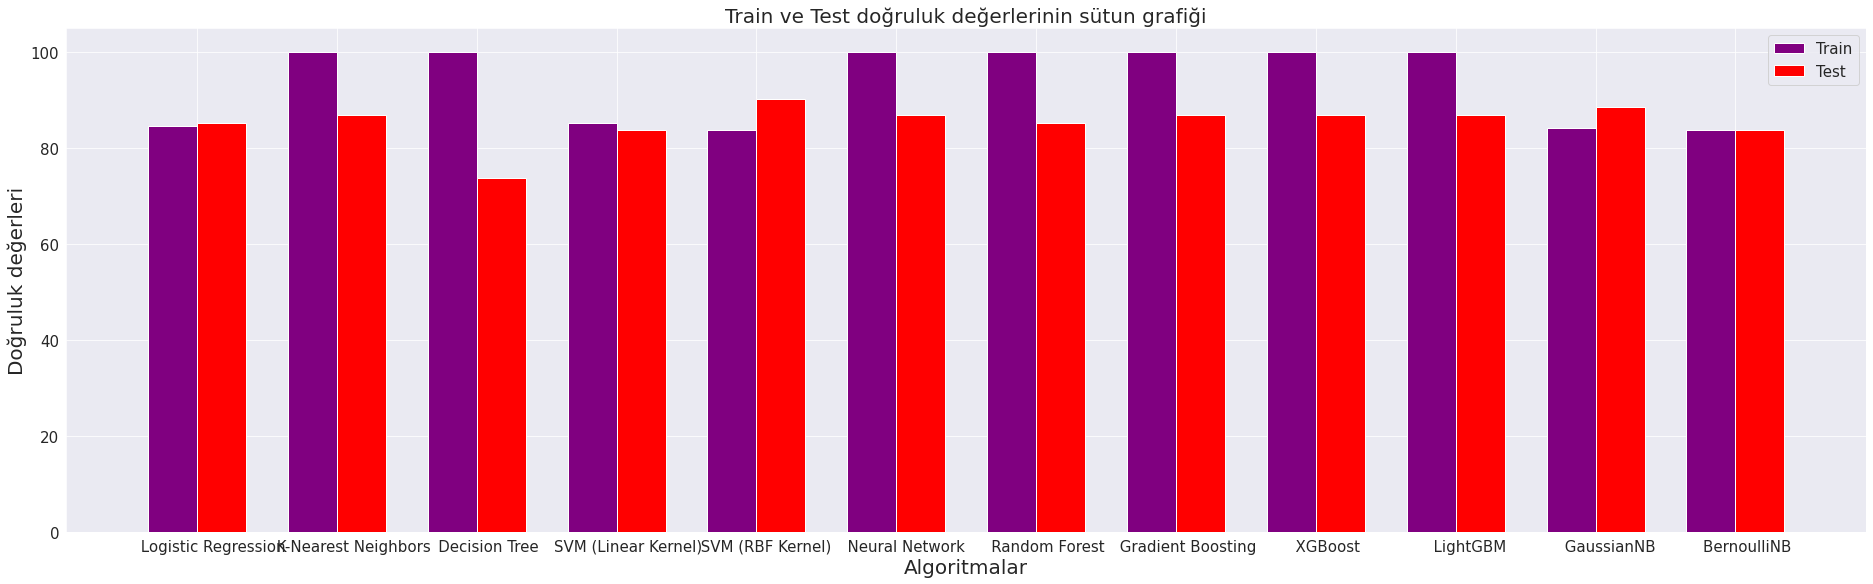

In [ ]:
fig = plt.figure(figsize=(25,7))

ax = fig.add_axes([0,0,1,1])

model_isim = [] * 10
skorlar = [] * 10
skorlar2 = [] * 10
i=0
for name, skor in skorlar_train.items():
    model_isim.append(name)
    skorlar.append(skor * 100)
    skorlar2.append(list(skorlar_test.values())[i] * 100)
    i=i+1
    

x = np.arange(len(model_isim))
width = 0.35 
rects1 = ax.bar(x - width/2, skorlar, width, label='Train', color='purple')
rects2 = ax.bar(x + width/2, skorlar2, width, label='Test', color= 'red')

plt.title("Train ve Test doğruluk değerlerinin sütun grafiği", fontsize = 20)
plt.xlabel('Algoritmalar', fontsize = 20)
plt.ylabel('Doğruluk değerleri', fontsize = 20)
ax.set_xticks(x)
ax.set_xticklabels(model_isim)
ax.legend()
plt.rcParams.update({'font.size': 15})


plt.show()

**SMOTE + HİPERPARAMETRELİ DEĞERLERİN CONFUSION MATRIXI**

In [ ]:
models2 = {
    "             Logistic Regression      ": logreg2,
    "             K-Nearest Neighbors      ": knn2,
    "               Decision Tree          ": dt2,
    "            SVM (Linear Kernel)       ": svcl2,
    "             SVM (RBF Kernel)         ": svck2,
    "              Neural Network          ": mlp2,
    "               Random Forest          ": rf2,
    "             Gradient Boosting        ": gb2,
    "                  XGBoost             ": xg2,
    "                  LightGBM            ": lg2,
    "                 GaussianNB           ": gnb2,
    "                BernoulliNB           ": bnb2
}

In [ ]:
from sklearn.metrics import confusion_matrix

for name, model in models2.items():
    Y_tahmin = model.predict(X_test)
    print(name, "\n", confusion_matrix(Y_test , Y_tahmin, labels=[0,1]), "\n")

             Logistic Regression       
 [[24  4]
 [ 5 28]] 

             K-Nearest Neighbors       
 [[24  4]
 [ 4 29]] 

               Decision Tree           
 [[23  5]
 [11 22]] 

            SVM (Linear Kernel)        
 [[23  5]
 [ 5 28]] 

             SVM (RBF Kernel)          
 [[24  4]
 [ 2 31]] 

              Neural Network           
 [[24  4]
 [ 4 29]] 

               Random Forest           
 [[24  4]
 [ 5 28]] 

             Gradient Boosting         
 [[24  4]
 [ 4 29]] 

                  XGBoost              
 [[24  4]
 [ 4 29]] 

                  LightGBM             
 [[24  4]
 [ 4 29]] 

                 GaussianNB            
 [[24  4]
 [ 3 30]] 

                BernoulliNB            
 [[23  5]
 [ 5 28]] 



### **KARŞILAŞTIRMA**

In [ ]:
list(models2.keys())

['             Logistic Regression      ',
 '             K-Nearest Neighbors      ',
 '               Decision Tree          ',
 '            SVM (Linear Kernel)       ',
 '             SVM (RBF Kernel)         ',
 '              Neural Network          ',
 '               Random Forest          ',
 '             Gradient Boosting        ',
 '                  XGBoost             ',
 '                  LightGBM            ',
 '                 GaussianNB           ',
 '                BernoulliNB           ']

In [ ]:
train3 = [] * 12
test3 = [] * 12
test_fark = [] * 12
train_fark = [] * 12
for skor in skorlar_train.values():
  train3.append(skor * 100)
for skor in skorlar_test.values():
  test3.append(skor * 100)

for x in range(12):
  train_fark.append(train3[x] - train1[x])
  test_fark.append(test3[x] - test1[x])


In [ ]:


kk = pd.DataFrame({'train_Default':("{:0.2f}%".format(x) for x in train1),
                   'train_SMOTE':("{:0.2f}%".format(x) for x in train2),
                   'train_SMOTE_H':("{:0.2f}%".format(x) for x in train3),
                   'train_fark':("{:0.2f}%".format(x) for x in train_fark),
                   '-': (["-","-","-","-","-","-","-","-","-","-","-","-"]),
                   'test_Default':("{:0.2f}%".format(x) for x in test1),
                   'test_SMOTE':("{:0.2f}%".format(x) for x in test2),
                   'test_SMOTE_H':("{:0.2f}%".format(x) for x in test3),
                   'test_fark':("{:0.2f}%".format(x) for x in test_fark)})
  

index_ = list(models2.keys())

kk.index = index_
  
kk.head(12)

,train_Default,train_SMOTE,train_SMOTE_H,train_fark,-,test_Default,test_SMOTE,test_SMOTE_H,test_fark
Logistic Regression,83.88%,84.09%,84.47%,0.59%,-,83.61%,81.97%,85.25%,1.64%
K-Nearest Neighbors,86.36%,87.12%,100.00%,13.64%,-,81.97%,78.69%,86.89%,4.92%
Decision Tree,100.00%,100.00%,100.00%,0.00%,-,75.41%,72.13%,73.77%,-1.64%
SVM (Linear Kernel),83.88%,84.09%,85.23%,1.34%,-,83.61%,80.33%,83.61%,0.00%
SVM (RBF Kernel),90.50%,90.91%,83.71%,-6.78%,-,88.52%,86.89%,90.16%,1.64%
Neural Network,95.45%,97.73%,100.00%,4.55%,-,86.89%,86.89%,86.89%,0.00%
Random Forest,100.00%,100.00%,100.00%,0.00%,-,81.97%,85.25%,85.25%,3.28%
Gradient Boosting,100.00%,100.00%,100.00%,0.00%,-,86.89%,86.89%,86.89%,0.00%
XGBoost,97.11%,96.97%,100.00%,2.89%,-,86.89%,83.61%,86.89%,0.00%
LightGBM,100.00%,100.00%,100.00%,0.00%,-,85.25%,86.89%,86.89%,1.64%
